Sveučilište u Zagrebu<br/>
Fakultet elektrotehnike i računarstva<br/>
Zavod za elektroničke sustave i obradbu informacija

Akademska školska godina 2021./2022.

**2. vježba: Linearni vremenski nepromjenjivi sustavi**

*Osnove obradbe signala* (183447, 223374)

Autor: Tomislav Petković

Datum: 2021-11-08

Molimo vas da komentare na ove upute (ispravke, primjedbe, prijedloge itd.) šaljete e-poštom na tomislav.petkovic.jr@fer.hr.

© Sveučilište u Zagrebu Fakultet elektrotehnike i računarstva, 2021.

Umnažanje i distribucija ovih uputa je dozvoljena samo ako svaka kopija sadrži gorenavedenu informaciju o autorskim pravima te ovu dozvolu o umnažanju.

# Uvod

Upute za drugu laboratorijsku vježbu iz predmeta *Osnove obradbe signala* su pripremljene u obliku <a href="https://jupyter.org/">Jupyterske</a> bilježnice.

Svi zadaci u ovoj bilježnici su dovoljno jednostavni tako da se mogu riješiti korištenjem <a href="https://colab.research.google.com">Googleovog Colaboratorya</a> (skraćeno Colab).

Svaki softver je samo alat. Sukaldno tome, osim Pythona slobodno smijete koristiti i druge alate kao što su <a href="https://www.mathworks.com/products/matlab.html">Matlab</a>, <a href="https://www.gnu.org/software/octave/index">GNU Octave</a> i <a href="https://www.scilab.org/">Scilab</a> kako bi riješili zadane zadatke. Napominjemo da korištenje drugih alata može značiti da vaš izvještaj s vježbe ne možete predati popunjavanjem ove bilježnice, odnosno da morate pripremiti novi pisani izvještaj. Dodatno, nastavnici vam mogu pomoći oko izrade vježbe samo ako koristite Colab i/ili Matlab.

## Upute za predaju izvještaja s vježbe

Ako rješavate vježbu u Pythonu korištenjem Colaba onda jednostavn upišite vaše odgovore u prazna polja, i to programski kod u polja za kod te odgovore na postavljena pitanja u tekstualna polja.

Prazna polja za programski kod sadrže zadani komentar `# Upišite vaše rješenje`, dok tekstualna polja u koja morate upisati odgovor sadrže masni tekst napisan velikim tiskanim slovima **OVDJE UPIŠITE VAŠ ODGOVOR**.

Jednom kada su svi zadaci riješeni ispunjenu bilježnicu pohranite u datoteku s imenom `JMBAG_IME_PREZIME.ipynb` i predajte je e-poštom na tomislav.petkovic.jr@fer.hr uz `[OOS] 2. vježba` kao naslov poruke.

Predane bilježnice će prvo biti automatski re-evaluirane što odgovara naredbi  *Restart and run all* u Colabu. Prema tome, svakako prije predaje vaše bilježnice pokrenite tu naredbu i provjerite ispravnost vaših rješenja.

Ako ste vježbu izradili korištenjem nekog drugog softvera koji nije kompatibilan s Jupyterskom bilježnicom onda morate pripremiti standardni pisani izvještaj s laboratorijske vježbe.

## Podaci o studentu

Molimo vas da prije ispunjavanja ostatka bilježnice dvaput kliknete na ovaj tekst te zatim upište vaše podatke:

Ime: **IME i PREZIME**

Matični broj (JMBAG): **0036XXXX**

## Preporučeno čitanje

Ako do sada niste koristili Python onda započnite s bilo kojim od kratkih uvoda za početnike kao što je npr. službeni tutorial dostupan na adresi <a href="https://docs.python.org/3/tutorial/">https://docs.python.org/3/tutorial/</a>.

Studentima dobro upoznatim s Matlabom koji su početnici u Pythonu se toplo preporuča da pročitaju dokument <a href="https://numpy.org/doc/stable/user/numpy-for-matlab-users.html">NumPy for Matlab users</a> prije rješavanja  laboratorijskih vježbi u Colabu.

## Uvoz potrebnih funkcija

Radi smanjivanja razlika između programskog koda u Pythonu i u Matlabu u ovoj bilježnici ćemo namjerno uvesti sve potrebne funkcije iz <a href="https://www.scipy.org/">SciPy</a>-ja, <a href="https://numpy.org/">NumPy</a>-ja i <a href="https://matplotlib.org/">Matplotlib</a>-a izravno u globalni imenik tako da možemo jednostavno pisati `fft` umjesto punog imena `scipy.fft.fft`.

Svakako imajte u vidu da je ovakav pristup uvjetno prihvatljiv radi pojednostavljenja koda za laboratorijske vježbe jer su rizici kolizije i neočekivanih nuspojava minimalni. Svakako ga je najbolje izbjegavati u produkcijskom kodu.

Ako preferirate korištenje imenika i punih imena funkcija onda slobodno izmijenite naredbe za uvoz funkcija tako da sve uvezene funkcije ostanu strogo razdvojene.

In [1]:
# Uvezi potrebne funkcije u globalni imenik
# Iz paketa scipy koristimo scipy.signal.step za kojeg postoji preklapanje s
# matplotlib.pyplot.step tako da scipy.signal moramo uvesti nakon matplotlib.pyplot
from numpy import *
from matplotlib.pyplot import *
from scipy.signal import *

# 1. Vremenski diskretni, linearni i vremenski nepromjenjivi sustavi

Prvi dio ove bilježnice istražuje kako korištenjem računala analiziramo vremenski diskretan, linearan i vremenski nepromjenjiv sustav. Za linearan i vremenski nepromjenjiv koristimo kraticu LTI, od engl. *linear time invariant*, pa tako kraće pišemo LTI sustav. Još preciznije, naše razmatranje u ovoj vježbi ograničavamo isključivo na kauzalne LTI sustave koji su opisani jednadžbom diferencija sa stalnim koeficijentima,

$$a_0y[n]+a_1y[n-1]+a_2y[n-2]+\cdots+a_Ny[n-N]=b_0x[n]+b_1x[n-1]+b_2x[n-2]+\cdots+b_Mx[n-M],$$

gdje je $x[n]$ ulazni signal, gdje je $y[n]$ je izlazni signal, i gdje su $a_i$, $i=1,\ldots,N$, i $b_j$, $j=0,1,\ldots,M$, stalni koefijenti.

U vremenskoj domeni uobičajeno sve članove te jednadžbe prikazujemo na način da trenutni izlaz $y[n]$ izražavamo kao funkciju svega ostalog, odnosno

$$y[n]={1\over a_0}\Bigl(-\sum_{i=1}^{N}a_iy[n-i]+\sum_{j=0}^{M}b_jx[n-j]\Bigr).$$

U ovako iskazanoj jednadžbi kauzalnost je jasno uočljiva jer su sve vrijednosti koje su potrebne za računanje izlaza $y[n]$ i koje se sada nalaze s desne strane jednakosti poznate u koraku $n$: članovi izlaza $y[n-i]$ za $i=1,\ldots,N$ su prethodne vrijednosti izlaza, a članovi ulaza $x[n-j]$ za $j=0,1,\ldots,M$ su trenutna i prethodne vrijednosti ulaza.

Tako zadanu jednadžbu diferencija uobičajeno rješavamo korištenjem jednostrane [Z transformacije](https://en.wikipedia.org/wiki/Z-transform).

Jednostrana Z transformacija nekog signala $x[n]$ je definirana kao

$$\mathcal{Z}\bigl[x[n]\bigr]=\sum_{n=0}^{+\infty}x[n]z^{-n}=X(z),$$

no samo za one vrijednosti kompleksne varijable $z$ za koju suma konvergira.

Primjena jednostrane Z transformacije na jednadžbu diferencija sa stalnim koeficijentima daje

\begin{align}
a_0Y(z)+a_1z^{-1}Y(z)+{}&a_2z^{-2}Y(z)+\cdots+a_Nz^{-N}Y(z)+{}\\
{}+y[-1]&\bigl(a_1+a_2z^{-1}+a_3z^{-2}+\cdots+a_Nz^{-N+1}\bigr)+{}\\
{}+y[-2]&\bigl(a_2+a_3z^{-1}+\cdots+a_Nz^{-N+2}\bigr)+{}\\
&\vdots\\
{}+y[-N+1]&\bigl(a_{-N+1}+a_{N}z^{-1})+{}\\
{}+y[-N]&a_{N}\\
=\\
b_0X(z)+b_1z^{-1}X(z)+{}&b_2z^{-2}X(z)+\cdots+b_Mz^{-M}X(z)+{}\\
{}+x[-1]&\bigl(b_1+b_2z^{-1}+b_3z^{-2}+\cdots+b_Mz^{-M+1}\bigr)+{}\\
{}+x[-2]&\bigl(b_2+b_3z^{-1}+\cdots+b_Mz^{-M+2}\bigr)+{}\\
&\vdots\\
{}+x[-M+1]&\bigl(b_{-M+1}+b_{M}z^{-1})+{}\\
{}+x[-M]&b_{M},
\end{align}

što možemo kompaktnije zapisati kao

$$Y(z)\sum_{i=0}^{N}a_iz^{-i}+\sum_{i=1}^{N}y[-i]\sum_{k=i}^{N}a_kz^{-k+i}=X(z)\sum_{j=0}^{M}b_jz^{-j}+\sum_{j=1}^{M}x[-j]\sum_{k=j}^{M}b_kz^{-k+j}.$$

Napomena: Članovi $y[-i]$ i $x[-j]$ su rezultat korištenja jednostrane Z transformacije u kojoj suma ide od $n=0$ i činjenice da u jednadžbi koristimo zakašnjele izlaze $y[n-i]$ i ulaze $x[n-j]$.

Zanemarivanjem početnih uvjeta $y[-i]$ i $x[-j]$ kroz postavljanje istih u nulu dobivamo

$$Y(z)\sum_{i=0}^{N}a_iz^{-i}=X(z)\sum_{j=0}^{M}b_jz^{-j},$$

što je jednostavan algebarski izraz koji povezuje Z transformacije ulaza $x[n]$ i izlaza $y[n]$.

Napomena: Zanemarivanje početnih uvjeta $y[-i]$ i $x[-j]$ kroz postavljanje u nulu je opravdano jer se može pokazati da početni uvjeti definiraju isključivo homogeni dio rješenja koji ne ovisi o ulazu $x[n]$ pa prema tome $Y(z)$ u ovoj pojednostavljenoj jednadžbi predstavlja Z transformaciju nekog partikularnog rješenja.

Prijenosnu funkciju vremenski diskretnog LTI sustava zato definiramo kao

$$H(z)={Y(z)\over X(z)}={\strut\displaystyle\sum_{j=0}^{M}b_jz^{-j}\over\strut\displaystyle\sum_{i=0}^{N}a_iz^{-i}}.$$

Prijenosna funkcija iskazana u ovom obliku se naziva direktnom jer su koeficijenti brojnika i nazivnika upravo koeficijenti polazne diferencijske jednadžbe sa stalnim koeficijentima.

Prvi koeficijent $a_0$ se često normalizira u $1$ čime dobivamo normaliziranu prijenosnu funkciju

$$H(z)={B(z)\over A(z)}={\strut\displaystyle\sum_{j=0}^{M}b_jz^{-j}\over\strut\displaystyle1+\sum_{i=1}^{N}a_iz^{-i}}={b_0+b_1z^{-1}+b_2z^{-2}+\cdots+b_{M}z^{-M}\over1+a_1z^{-1}+a_2z^{-2}+\cdots+a_Nz^{-N}}.$$

Korijene $p_k$, $k=1,\ldots,N$, polinoma $A(z)=\sum_{i=0}^{N}a_iz^{-i}=a_0\prod_{k=1}^{N}(1-p_kz^{-1})$ u **nazivniku** nazivamo **polovima**.

Korijene $q_k$, $k=1,\ldots,M$ polinoma $B(z)=\sum_{j=0}^{M}b_jz^{-j}=b_0\prod_{k=1}^{M}(1-q_kz^{-1})$ u **brojniku** nazivamo **nulama**.

**Red sustava** jest veći od brojeva $N$ i $M$.

Prijenosna funkcija $H(z)$ se često iskazuje kao produkt svojih korjenih faktora što daje reprezentaciju izraženu preko nula, polova i pojačanja, odnosno

$$H(z)={B(z)\over A(z)}=K{\strut\displaystyle\prod_{k=1}^{M}(1-q_kz^{-1})\over\strut\displaystyle\prod_{k=1}^{N}(1-p_kz^{-1})}=Kz^{M-N}{\strut\displaystyle\prod_{k=1}^{M}(z-q_k)\over\strut\displaystyle\prod_{k=1}^{N}(z-p_k)},$$

pri čemu je $K=b_0/a_0$ pojačanje, a $q_k$ i $p_k$ su nule i polovi. Izlučeni član $z^{M-N}$ definira ili trivijalne polove ili trivijalne nule, ovisno o tome koji od brojeva $N$ i $M$ je veći.

Kažemo da je vremenski diskretan LTI sustav **stabilan** ako se **svi** njegovi polovi nalaze **unutar jedinične kružnice**, odnosno ako su $p_k$, $k=1,\ldots,N$, rješenja jednadžbe $0=A(z)=\sum_{i=0}^{N}a_iz^{-i}$ onda je sustav stabilan ako je $|p_k|<1$ za sve $k$.

## 1.1. Definiranje vremenski diskretnog LTI sustava

Neka je vremenski diskretan LTI sustav zadan svojom prijenosnom funkcijom

$$H(z)={B(z)\over A(z)}={b_0+b_1z^{-1}+b_2z^{-2}+\cdots+b_{M}z^{-M}\over a_0+a_1z^{-1}+a_2z^{-2}+\cdots+a_Nz^{-N}}.$$

Za definiranje takvog sustava koristimo [`scipy.signal.TransferFunction`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.TransferFunction.html). No ta funkcija se koristi i za definiranje vremenski kontinuiranih sustava i za definiranje vremenski diskretnih sustava. Kako bi odredili koji od njih definiramo, za vremenski diskretne LTI sustave uvijek moramo zadati period očitavanja `dt`. Primijetite da sama prijenosna funkcija i pripadna jednadžba diferencija ostaju nepromijenjenje bez obzira na izbor perioda očitavanja tako da možemo odabrati bilo koju vrijednost za `dt`, no ako želimo koristiti normalnu vremensku os u kojem vrijeme odgovara jednom koraku ili indeksu pojedinog uzorka onda biramo `dt=1`.

Uobičajeni način predstavljanja prijenosne funkcije $H(z)$ u obradbi signala jest korištenjeme negativnih potencija kompleksne varijable $z$. Taj odabir je uvjetovan time da se tako naglašava kauzlanost. Naime, prijenosne funkcije nekauzalnih sustava se ne mogu iskazati korištenjem samo negativnih potencija kompleksne varijable $z$. Nažalost, i Pythonova funkcija [`scipy.signal.TransferFunction`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.TransferFunction.html) i Matlabova funkcija [`tf`](https://www.mathworks.com/help/control/ref/tf.html) su zamišljene za ulazne argumente primaju koeficijente prijenosne funkcije iskazane preko pozitivnih potencija kompleksne varijable $z$. Zato uvijek moramo prepraviti prijenosnu funkciju izlučivanjem odgovarajućih faktora iz brojnika i nazivnika, odnosno

$$H(z)={B(z)\over A(z)}=z^{N-M}{b_0z^{M}+b_1z^{M-1}+b_2z^{M-2}+\cdots+b_{M}\over a_0z^{N}+a_1z^{N-1}+a_2z^{N-2}+\cdots+a_N}.$$

I u SciPyju i u Matlabu polinome reprezentiraju vektori koji sadrže redom spremljene koeficijente nekog polinoma, i to tako da prvi koeficijent odgovara najvećoj potenciji, a ostali koeficijenti redom svim preostalim manjim potencijama poredanim silazno. Prema tome, želimo li predstaviti određeni polinom neke prijenosne ponekad moramo dodati nule u niz kojim opisujemo brojnik $B(z)$ ili nazivnik $A(z)$. Kao primjer nam može poslužiti prijenosna funkcija

$$H(z)={1\over 6+5z^{-1}+z^{-2}}={z^2\over 6z^2+5z+1}.$$

Koja od sljedeće dvije definicije te prijenonse funkcije je ispravna?

In [2]:
# Prijenosnu funkciju H1 spremamo u sys1
num1 = [1]
den1 = [6, 5, 1]
sys1 = TransferFunction(num1, den1, dt=1)

# Prijenosnu funkciju H2 spremamo u sys2
num2 = [1, 0, 0]
den2 = [6, 5, 1]
sys2 = TransferFunction(num2, den2, dt=1)


Nakon izvršavanja gornjeg koda u varijablu `sys1` je spremljena prijenosna funkcija

$$H_1(z)={{1\over6}\over z^2+{5\over6}z+{1\over6}}={z^{-2}\over 6+5z^{-1}+z^{-2}},$$

dok je u varijablu `sys2` spremljena prijenosna funkcija

$$H_2(z)={{1\over6}z^2\over z^2+{5\over6}z+{1\over6}}={1\over 6+5z^{-1}+z^{-2}}.$$

Prema tome ispravna definicija prijenosne funkcije je druga u koju smo dodali nule. Jedina razlika između definiranih prijenosnih funkcija jest u članu $z^{-2}$ (ili $z^2$, ovisno koju funkciju uzimate kao polaznu za usporedbu). Taj član dodaje ili uklanja trivijalne polove ili nule, jedini efekt trivijalnih polova ili nula u ovom slučaju jest unos vremenskog pomaka od dva koraka. 

Također primijetite da SciPy uvijek normalizira prijenosnu funkciju.

## 1.2. Analiza vremenski diskretnog LTI sustava

Jednom kada smo definirali vremenski diskretan LTI sustav istog želimo analizirati. Za potpunu analizu uobičajeno:

1.   računamo polove i nule te crtamo njihove položaje u kompleksnoj ravnini,
2.   ispitujemo stabilnost sustava,
3.   iskazujemo prijenosnu funkciju preko nula, polova i pojačanja,
4.   računamo frekvencijsku karakteristiku, i
5.   određujemo odziv sustava na jedinični impuls i jediničnu stepenicu.

### 1.2.1. Polovi i nule vremenski diskretnog sustava

Polovi i nule su korijeni polinoma u brojniku i nazivniku. Možemo ih izračunati korištenjem funkcije `roots`, bilo Pythonove funkcije [`numpy.roots`](https://numpy.org/doc/stable/reference/generated/numpy.roots.html) ili Matlabove [`roots`](https://www.mathworks.com/help/matlab/ref/roots.html). U Matlabu možemo jednostavno nacrtati položaje svih polova i nula korištenjem naredbe [`pzmap`](https://www.mathworks.com/help/control/ref/pzmap.html), no takva naredba nažalost ne postoji u NumPyju ili SciPyju. Zato moramo crtati položaj polova i nula korištenjem standardnih funkcija za crtanje.

Napomena: Kod crtanja mjesta korjena (položaja polova i nula) dogovorno polove označavamo s `x`, a nule s `o`.

[0. 0.]
[-0.5        -0.33333333]


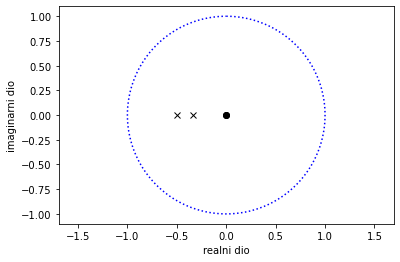

In [3]:
# Izračunaj nule i polove
zeros = roots(num2)
poles = roots(den2)

# Ispiši dobivene vrijednosti
print(zeros)
print(poles)

# Nacrtaj mjesta korjena (nula i polova)
plot(real(zeros), imag(zeros), 'ko')
plot(real(poles), imag(poles), 'kx')

# Nacrtaj jediničnu kružnicu (granica područja stabilnosti)
t = arange(0.0, 2*pi, 0.01)
plot(sin(t), cos(t), 'b:')
axis("equal")
xlabel("realni dio")
ylabel("imaginarni dio");

### 1.2.2. Stabilnost vremenski diskretnog sustava

Za ispitivanje stabilnosti vremenski diskretnog LTI sustava moramo odrediti gdje se nalaze njegovi polovi. Ako su svi polovi unutar jedinične kružnice onda je sustav stabilan. U suprotnom, ako se barem jedan pol nalazi na ili izvan jedinične kružnice, onda je sustav nestabilan.

U gornjem primjeru svi polovi su unutar jedinične kružnice pa je prema tome sustav zadan varijablama `num2` i `den2` (odnosno varijablom `sys2`) stabilan.

### 1.2.3. Reprezentacija preko nula, polova i pojačanja

Reprezentaciju sustava preko nula, polova i pojačanja (engl. *zero-pole-gain*, još se koristi i kratica ZPK gdje K označava konstantu koja definira pojačanje) dobivamo korištenjem funkcije [`scipy.signal.tf2zpk`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.tf2zpk.html) ili metode [`to_zpk`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.TransferFunction.to_tf.html). Funkcija u Matlabu je jednaka, [`tf2zpk`](https://www.mathworks.com/help/signal/ref/tf2zpk.html).

In [4]:
tf2zpk(num2, den2)

(array([0., 0.]), array([-0.5       , -0.33333333]), 0.16666666666666666)

Iz dobivenog ispisa vidimo da su dvije nule $q_{1,2}=0$, da su dva pola $p_1=-{1\over2}$ i $p_2=-{1\over3}$, i da je pojačanje $K={1\over6}$.

Sve te vrijednosti zajedno jednoznačno definiraju prijenosnu funkciju

$$H(z)=K{(z-q_1)(z-q_2)\over(z-p_1)(z-p_2)}={1\over6}{(z-0)(z-0)\over(z+{{1\over2}})(z+{1\over3})}.$$

### 1.2.4. Frekvencijska karakteristika

Frekvencijska karakteristika vremenski diskretnog LTI sustava određuje odziv sustava na sinusoidalnu pobudu. Preciznije, ako je pobuda sustava oblika

$$x[n]=A_0\cos(\omega_0n+\varphi),$$

onda je odziv

$$y[n]=A(\omega_0)A_0\cos\bigl(\omega_0n+\varphi+\phi(\omega_0)\bigr),$$

gdje je $A(\omega_0)$ amplitudni dio frekvencijske karakteristike i gdje je $\phi(\omega_0)$ fazni dio frekvencijske karakteristike.

Frekvencijsku karakteristiku dobivamo iz prijenosne funkcije $H(z)$ zamjenom $z\mapsto e^{j\omega}$. Ta zamjena je dobro definirana samo ako područje konvergencije ili RoC, od engl. *region of convergence*, prijenosne funkcije $H(z)$ sadrži jediničnu kružnicu. Za stabilne kauzalne sustave jedinična kružnica je uvijek unutar područja konvergnecije pa zamjena $z\mapsto e^{j\omega}$ u tom slučaju uvijek pretvara Z transformaciju $H(z)$ u vremenski diskretnu Fourierovu transformaciju (DTFT) $H(e^{j\omega})$.

Kada znamo frekvencijsku karakterisitku $H(e^{j\omega})$ istu razdvajamo na amplitudno-frekvencijsku karakteristiku

$$A(\omega)=\bigl|H(e^{j\omega})\bigr|,$$

i na fazno-frekvencijsku karakteristiku

$$\phi(\omega)=\angle H(e^{j\omega}).$$

Dvije funkcije koje u SciPyju koristimo za računanje frekvencijske karakteristike su [`scipy.signal.dfreqresp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dfreqresp.html) i [`scipy.signal.dbode`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dbode.html).

`dfreqresp` vraća dva niza brojeva od kojih prvi sadrži uzorke frekvencije $\omega_k$, a drugi vrijednosti frekvencijske karakteristike $H(e^{j\omega_k})$.

`dbode` pak odmah razdvaja frekvencijsku karakterisitku i vraća tri niza, prvi je opet $\omega_k$, no druga dva su amplitudno-frekvencijska karakterisitka $A_{\text{dB}}$ izražena u decibelima [dB] i fazno-frekvencijska karakterisitka $\phi_{\text{stp}}$ izražena u stupnjevima [°], odnosno

$$A_{\text{dB}}(\omega)=20\log_{10}\bigl|H(e^{j\omega})\bigr|$$

i

$$\phi_{\text{stp}}(\omega)={\pi\over180^\circ}\angle H(e^{j\omega}).$$

Za računanje frekvencijske karakteristike također možemo koristiti i `freqz`, i to i u SciPyju i u Matlabu. Funkcija `freqz` kao ulaze očekuje koeficijente brojnika i nazivnika iskazane u negativnim potencijama od $z$, kao što je i standard u obradbi signala.

U SciPyju funkcija [`freqz`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html) jednostavno računa frekvencijsku karakteristiku iz zadanih koeficijenata brojnika i nazivnika neke racionalne prijenosne funkcije. U odnosnu na istu funkciju u Matlabu redoslijed izlaza funkcije `freqz` u SciPyju je obrnut.

U Matlabu funkcija [`freqz`](https://www.mathworks.com/help/signal/ref/freqz.html) ima dualno ponašanje, odnosno ako izlaz `freqz` ne pridružimo nekoj varijabli onda funkcija odmah crta amplitudnu i faznu frekvencijsku karakterisitku, a ako izlaz pridružujemo nekoj varijabli onda funkcija vraća vrijednosti od $H(e^{j\omega_k})$ i pripadne frekvencije $\omega_k$.

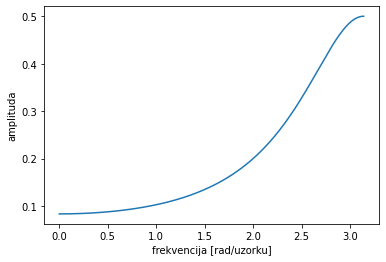

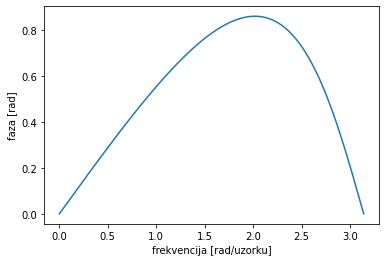

In [5]:
# Izračunaj frekvencijsku karakteristiku
w2, H2 = dfreqresp(sys2)

# Nacrtaj amplitudnu karakteristiku
figure(1)
plot(w2, abs(H2))
xlabel('frekvencija [rad/uzorku]')
ylabel('amplituda')

# Nacrtaj faznu karakteristiku
figure(2)
plot(w2, angle(H2))
xlabel('frekvencija [rad/uzorku]')
ylabel('faza [rad]');

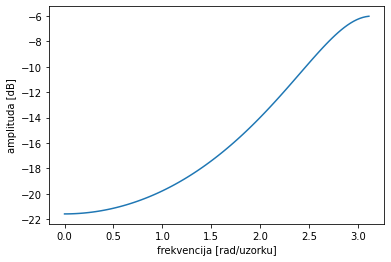

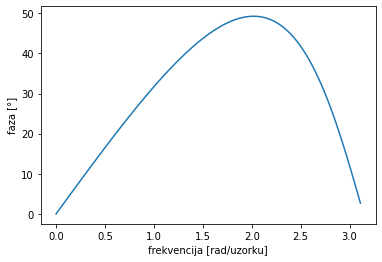

In [6]:
# Izračunaj amplitudnu karakterisitku u dB i faznu karakteristiku u stupnjevima
w2, mag2, phase2 = dbode(sys2)

# Nacrtaj amplitudnu karakteristiku
figure(3)
plot(w2, mag2)
xlabel('frekvencija [rad/uzorku]')
ylabel('amplituda [dB]')

# Nacrtaj faznu karakterisitku
figure(4)
plot(w2, phase2)
xlabel('frekvencija [rad/uzorku]')
ylabel('faza [°]');

### 1.2.5. Odziv na jedinični impuls i odziv na jediničnu stepenicu

Impulsni odziv $h[n]$ jest odziv mirnog sustava na jedinični impuls $\delta[n]$.

Mirni sustav jest sustav u kojem su svi početni uvjeti jednaki nuli.

Impulsni odziv i prijenosna funkcija su par po Z transformaciji, odnosno $\mathcal{Z}\bigl[h[n]\bigr]=H(z)$.

Ako je sustav stabilan onda je DTFT transformacija impulsnog odziva jednaka frekvencijskoj karakteristici tog sustava.

Nacrtamo li impulsni odziv onda temeljem te slike također možemo ispitati stabilnost sustava.

Ako $h[n]\to0$ za $n\to\infty$ onda kažemo da je sustav **stabilan**.

Ako $h[n]\to\pm\infty$ za $n\to\infty$ onda kažemo da je sustav **nestabilan**.

U posebnom slučaju kada je $h[n]$ ograničen a nije jednak nuli kada $n\to\infty$, odnosno $h[n]$ ili teži k nekoj konstanti $K\in\mathbb{R}\setminus\{0\}$ ili je periodičan, možemo kazati da je sustav **granično stabilan**.

Odziv na jediničnu stepenicu $s[n]$ definiramo kao odziv mirnog sustava na pobudu $\mu[n]$. Odziv na jediničnu stepenicu je od posebne važnosti u automatskom upravljanju jer pruža uvid u prijelazni odziv sustava.

Za računanje impulsnog odziva i odziva na stepenicu koristimo [`scipy.signal.dimpulse`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dimpulse.html) i [`scipy.signal.dstep`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dstep.html).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


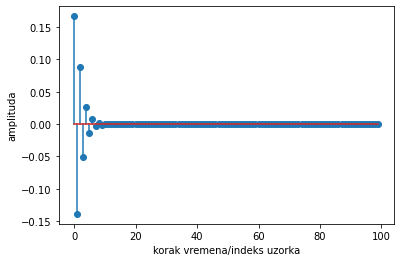

In [7]:
# Odredi impulsni odziv
n, h2 = dimpulse(sys2)

# Nacrtaj impulsni odziv
figure(1)
stem(n, squeeze(h2))
xlabel("korak vremena/indeks uzorka")
ylabel("amplituda");

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


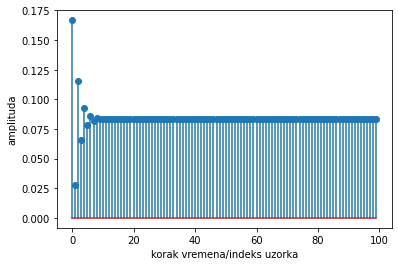

In [8]:
# Odredi odziv na stepenicu
n, s2 = dstep(sys2)

# Nacrtaj odziv na stepenicu
figure(2)
stem(n, squeeze(s2))
xlabel("korak vremena/indeks uzorka")
ylabel("amplituda");

## 1.A Vremenski diskretni LTI sustav prvog reda

Vremenski diskretan LTI sustav prvog reda ima samo jedan pol. Uz taj pol može i ne mora imati jednu nulu. Ako je uz to sustav opisan diferencijskom jednadžbom s realnim koeficijentima onda su i nula i pol čisto realni.

U prvom zadatku ove laboratorijske vježbe želimo ispitati sve moguće položaje tog jednog pola koji su od interesa. Prisjetite se da položaj pola obzirom na jediničnu kružnicu definira stabilnost sustava. Prema tome, zanima nas kako se sustav ponaša za pol unutar jedinične kružnice, za pol izvan jedinične kružnice, i za pol koji se nalazi točno na jediničnoj kružnici. Dodatno, kako je jedan pol ograničen na realnu os, isti može biti po predznaku ili pozitivan ili negativan. Navedene mogućnosti nam daju sveukupno šet mogućih položaja pola koji su od interesa.

Neka promatrani vremenski diskretni LTI sustav ima točno jedan pol $p$ te neka je pripadna prijenosna funkcija

$$H(z)={b_0\over1-pz^{-1}},$$

gdje je

$$b_0=\begin{cases}1-p,&p\neq 1\\1,&p=1\end{cases}$$

Neka su $p_k\in\{2,1,{1\over2},-{1\over2},-1,-2\}$ šest brojeva koji definiraju šest različitih položaja pola. Označimo s $H_k(z)$ prijenosnu funkciju koja odgovara polu $p_k$, odnosno $H_k(z)={b_k\over1-p_kz^{-1}}$ gdje je $b_k=1-p_k$ za $p_k\neq 1$ i $b_k=1$ inače; ovu oznaku koristite u vašim odgovorima kako bi jasno identificirali odgovarajući sustav.

Za svaki od šet polova definirajte prijenosnu funkciju, nađite njene nule i polove, izračunajte frekvencijsku karakteristiku (i to bez obzira na stabilnost sustava), nacrtajte amplitudnu i faznu frekvencijsku karakteristiku, te nacrtajte impulsni odziv, i to sve na način kako je objašnjeno u uvodnom dijelu ove vježbe.

Uputa: Prvo pripremite odsječak koda i/ili funkciju s kojim rješavate problem za neki određeni izbor pola, npr. za $p_1=2$. Zatim iskoristite taj kod šest puta u petlji kako bi rješili zadatak za sve zadane $p_k$. Po potrebi slobodno dodajte koliko god polja za upis koda vam treba.

In [9]:
# Upišite vaše rješenje

Nakon što ste analizirali svih šest zadanih sustava odgovorite na sljedeća pitanja:

Koji sustavi su stabilni, a koji su nestabilni? Objasnite zašto!

**OVDJE UPIŠITE VAŠ ODGOVOR**

Koji sustavi imaju istu amplitudno-frekvencijsku karakterisitku? Ako znate zašto su karakteristike identične onda uz odgovor dopišite i vaše objašnjenje!

**OVDJE UPIŠITE VAŠ ODGOVOR**

Što se dogodilo s frekvencijskim karekteristikama za $p_2=1$ i za $p_4=-1$?

**OVDJE UPIŠITE VAŠ ODGOVOR**

## 1.B Vremenski diskretni LTI sustav drugog reda

Vremenski diskretni LTI sustav drugog reda ima dva pola. Uz ta dva pola može i ne mora imati dvije ne-trivijalne nule. Ako je uz to sustav opisan diferencijskom jednadžbom s realnim koeficijentima onda su njegove nule i polovi ili čisto realni ili dolaze u konjugirano-kompleksnim parovima.

U drugom zadatku ove vježbe želimo ispitati dva zanimljiva položaja polova koji dolaze u konjugirano-kompleksnom paru.

Neka promatrani vremenski diskretan LTI sustav ima konjugirano-kompleksni par polova $p$ i $p^*$, $p,p^*\neq1$, i neka je pripadna prijenosna funkcija

$$H(z)={(1-p)(1-p^*)\over(1-pz^{-1})(1-p^*z^{-1})}$$

Neka dvije vrijednosti pola od interesa budu $p_k\in\{{1\over2}+{1\over2}j,1-j\}$. Neka $H_k(z)$ bude oznaka za prijenosnu funkciju i za sustav čiji polovi su $p_k$ i $p_k^*$; tu oznaku koristite u vašim odgovorima kako bi identificirali pojedini zadani sustav.

Za svaki od zadana dva slučaja definirajte prijenosnu funkciju, nađite njene nule i polove, izračunajte frekvencijsku karakteristiku, nacrtajte amplitudnu i faznu frekvencijsku karakteristiku (bez obzira na stabilnost), te nacrtajte impulsni odziv, i to sve na način kako je objašnjeno u uvodnom dijelu ove vježbe.

In [10]:
# Upišite vaše rješenje

Nakon što ste analizirali dva zadana sustava odgovorite na sljedeća pitanja:

Koji sustavi su stabilni, a koji su nestabilni? Objasnite zašto!

**OVDJE UPIŠITE VAŠ ODGOVOR**

Je li amplitudno-frekvencijska karakteristika oba sustava jednaka? Ako znate zašto jest jednaka onda uz odgovor dopišite i vaše objašnjenje!

**OVDJE UPIŠITE VAŠ ODGOVOR**

# 2. Vremenski kontinuirani, linearni i vremenski nepromjenjivi sustavi (neobavezno)

**Ovaj dio vježbe nije obavezan; riješite ga ako želite znati više.**

Drugi dio ove bilježnice istražuje kako korištenjem računala analiziramo vremenski kontinuirani, linearan i vremenski nepromjenjiv sustav, ili kraće vremenski kontinuirani LTI sustav. Naše razmatranje u ovoj vježbi dodatno ograničavamo isključivo na kauzalne LTI sustave koji su opisani diferencijalnom jednadžbom sa stalnim koeficijentima,

$$a_Ny^{(N)}(t)+a_{N-1}y^{(N-1)}(t)+\cdots+a_{1}y^{(1)}(t)+a_0y(t)=b_Mx^{(M)}(t)+b_{M-1}x^{(M-1)}(t)+\cdots+b_{1}x^{(1)}(t)+b_0x(t),$$

gdje je $x(t)$ ulazni signal, gdje je $y(t)$ izlazni signal, i gdje su $a_i$, $i=0,\ldots,N$, i $b_j$, $j=0,1,\ldots,M\le N$, stalni koeficijenti.

Za vremenski kontinuirane sustave uvodimo dodatno ograničenje $M\le N$ koje je nužno da bi sustav bio realizibilan. Primijetite da takvo ograničenje nije postojalo za vremenski diskretne LTI sustave opisane diferencijskim jednadžbama sa stalnim koeficijentima.

Tako zadanu jednadžbu diferencija uobičajeno rješavamo korištenjem jednostrane [Laplaceove transformacije](https://en.wikipedia.org/wiki/Laplace_transform).

Jednostrana Laplaceova transformacija nekog signala $x(t)$ je definirana kao

$$\mathcal{L}\bigl[x(t)\bigr]=\int_{0^-}^{+\infty}x(t)e^{-st}\,dt=X(s),$$

no samo za one vrijednosti kompleksne varijable $s$ za koju integral konvergira.

Primjena jednostrane Laplaceove transformacije na diferencijalnu jednadžbu sa stalnim koeficijentima daje

\begin{align}
a_0Y(s)+a_1sY(s)+{}&a_2s^{2}Y(s)+\cdots+a_Ns^{N}Y(s)\\
{}-y^{(0)}(0^-)&\bigl(a_1+a_2s+a_3s^{2}+\cdots+a_Ns^{N-1}\bigr)\\
{}-y^{(1)}(0^-)&\bigl(a_2+a_3s+\cdots+a_Ns^{N-2}\bigr)\\
&\vdots\\
{}-y^{(N-2)}(0^-)&\bigl(a_{-N+1}+a_{N}s)\\
{}-y^{(N-1)}(0^-)&a_{N}\\
=\\
b_0X(s)+b_1sX(s)+{}&b_2s^{2}X(s)+\cdots+b_Ms^{M}X(s)\\
{}-x^{(0)}(0^-)&\bigl(b_1+b_2s+b_3s^{2}+\cdots+b_Ms^{M-1}\bigr)\\
{}-x^{(1)}(0^-)&\bigl(b_2+b_3s+\cdots+b_Ms^{M-2}\bigr)\\
&\vdots\\
{}-x^{(M-2)}(0^-)&\bigl(b_{-M+1}+b_{M}s)\\
{}-x^{(M-1)}(0^-)&b_{M},
\end{align}

što možemo kompaktnije zapisati kao

$$Y(s)\sum_{i=0}^{N}a_is^{i}+\sum_{i=1}^{N}y^{(i-1)}(0^-)\sum_{k=i}^{N}a_ks^{k-i}=X(s)\sum_{j=0}^{M}b_js^{j}+\sum_{j=1}^{M}x^{(j-1)}(0^-)\sum_{k=j}^{M}b_ks^{k-j}.$$

Napomena: Članovi $y^{(i-1)}(0^-)$ i $x^{(j-1)}(0^-)$ su rezultat korištenja jednostrane Laplaceove transformacije u kojoj integral ide od $t=0^-$ i činjenice da u jednadžbi koristimo derivacije izlaza $y(t)$ i ulaza $x(t)$.

Zanemarivanjem početnih uvjeta $y^{(i-1)}(0^-)$ i $x^{(j-1)}(0^-)$ kroz postavljanje istih u nulu dobivamo

$$Y(s)\sum_{i=0}^{N}a_is^{i}=X(s)\sum_{j=0}^{M}b_js^{j},$$

što je jednostavan algebarski izraz koji povezuje Laplaceove transformacije ulaza $x(t)$ i izlaza $y(t)$.

Napomena: Zanemarivanje početnih uvjeta $y^{(i-1)}(0^-)$ i $x^{(j-1)}(0^-)$ kroz postavljanje istih u nulu je opravdano jer se može pokazati da početni uvjeti definiraju isključivo homogeni dio rješenja koji ne ovisi o ulazu $x(t)$ osim u točci $t=0^-$, pa prema tome $Y(s)$ u ovoj pojednostavljenoj jednadžbi predstavlja jednostranu Laplaceovu transformaciju nekog partikularnog rješenja.

Prijenosnu funkciju vremenski kontinuiranog LTI sustava zato definiramo kao

$$H(s)={Y(s)\over X(s)}={\strut\displaystyle\sum_{j=0}^{M}b_js^{j}\over\strut\displaystyle\sum_{i=0}^{N}a_is^{i}}.$$

Posljednji koeficijent $a_N$ se često normalizira u $1$ čime dobivamo normaliziranu prijenosnu funkciju

$$H(s)={B(s)\over A(s)}={\strut\displaystyle\sum_{j=0}^{M}b_js^{j}\over\strut\displaystyle\sum_{i=0}^{N-1}a_is^{i}+s^N}={b_{M}s^{M}+b_{M-1}s^{M-1}+\cdots+b_2s^{2}+b_1s+b_0\over s^N+a_{N-1}s^{N-1}+\cdots+a_2s^{2}+a_1s+a_0}.$$

Korijene $p_k$ polinoma $A(s)=\sum_{i=0}^{N}a_is^{i}=a_N\prod_{k=0}^{N}(s-p_k)$ u **nazivniku** nazivamo **polovima**.

Korijene $z_k$ polinoma $B(s)=\sum_{j=0}^{M}b_js^{j}=b_M\prod_{k=0}^{M}(s-z_k)$ u **brojniku** nazivamo **nulama**.

**Red sustava** jest $N$.

Prijenosna funkcija $H(s)$ se često iskazuje kao produkt svojih korjenih faktora što daje reprezentaciju izraženu preko nula, polova i pojačanja, odnosno

$$H(s)={B(s)\over A(s)}=K{\strut\displaystyle\prod_{k=1}^{M}(s-z_k)\over\strut\displaystyle\prod_{k=1}^{N}(s-p_k)},$$

gdje je $K=b_M/a_N$ pojačanje, a $z_k$ i $p_k$ su nule i polovi.

Kažemo da je vremenski kontinuirani LTI sustav **stabilan** ako je realni dio **svih** njegovih polova negativan, odnosno ako su $p_k=\sigma_k+j\omega_k$, $p_k\in\mathbb{C}$ uz $\sigma_k,\omega_k\in\mathbb{R}$, polovi i rješenja jednadžbe $0=A(s)=\sum_{i=0}^{N}a_is^{i}$ onda je sustav stabilan ako je $\sigma_k<0$ za sve $k$.

## 2.1. Definiranje vremenski kontinuiranog LTI sustava

Neka je vremenski kontinuiran LTI sustav zadan svojom prijenosnom funkcijom

$$H(s)={B(s)\over A(s)}={b_{M}s^{M}+b_{M-1}s^{M-1}+\cdots+b_2s^{2}+b_1s+b_0\over a_Ns^N+a_{N-1}s^{N-1}+\cdots+a_2s^{2}+a_1s+a_0}.$$

Za definiranje takvog sustava koristimo funkciju [`scipy.signal.TransferFunction`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.TransferFunction.html). Ta funkcija se koristi i za definiranje vremenski kontinuiranih sustava i za definiranje vremenski diskretnih sustava. Želimo li deinirati vremenski kontinuirani sustav dovoljno je zadati sve koeficijente brojnika i nazivnika, dakle ne smijemo zadavati vrijeme očitavanja `dt`.

Pokažimo definiranje LTI sustava za prijenosne funkciju

$$H(s)={1\over s^2+2s+3}.$$

In [11]:
# Spremamo prijenosnu funkciju H u varijablu sys
num = [1]
den = [1, 2, 3]
sys = TransferFunction(num, den)

## 2.2. Analiza vremenski kontinuiranog LTI sustava

Jednom kada smo definirali vremenski kontinuiran LTI sustav istog želimo analizirati. Za potpunu analizu uobičajeno:

1.   računamo polove i nule te crtamo njihove položaje u kompleksnoj ravnini,
2.   ispitujemo stabilnost sustava,
3.   iskazujemo prijenosnu funkciju preko nula, polova i pojačanja,
4.   računamo frekvencijsku karakteristiku, i
5.   određujemo odziv sustava na jedinični impuls i jediničnu stepenicu.

### 2.2.1. Polovi i nule vremenski kontinuiranog sustava

Polovi i nule su korijeni polinoma u brojniku i nazivniku. Možemo ih izračunati korištenjem funkcije `roots`, bilo Pythonove funkcije [`numpy.roots`](https://numpy.org/doc/stable/reference/generated/numpy.roots.html) ili Matlabove [`roots`](https://www.mathworks.com/help/matlab/ref/roots.html). U Matlabu možemo jednostavno nacrtati položaje svih polova i nula korištenjem naredbe [`pzmap`](https://www.mathworks.com/help/control/ref/pzmap.html), no takva naredba nažalost ne postoji u NumPyju ili SciPyju. Zato moramo crtati položaj polova i nula korištenjem standardnih funkcija za crtanje.

Napomena: Kod crtanja mjesta korjena (položaja polova i nula) dogovorno polove označavamo s `x`, a nule s `o`.

[]
[-1.+1.41421356j -1.-1.41421356j]


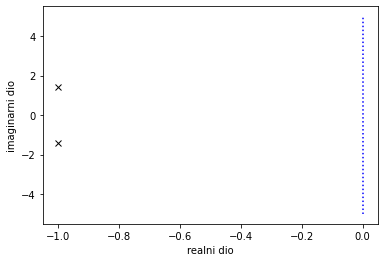

In [12]:
# Izračunaj nule i polove
zeros = roots(num)
poles = roots(den)

# Ispiši dobivene vrijednosti
print(zeros)
print(poles)

# Nacrtaj mjesta korjena (nula i polova)
plot(real(zeros), imag(zeros), 'ko')
plot(real(poles), imag(poles), 'kx')

# Nacrtaj imaginarnu os (granica područja stabilnosti)
plot([0, 0], [-5, 5], 'b:')
xlabel("realni dio")
ylabel("imaginarni dio");

### 2.2.2. Stabilnost vremenski kontinuiranog sustava

Za ispitivanje stabilnosti vremenski kontinuiranog LTI sustava moramo odrediti gdje se nalaze njegovi polovi. Ako su svi polovi lijevo od imaginarne osi onda je sustav stabilan. U suprotnom, ako se barem jedan pol nalazi na ili desno od imaginarne osi onda je sustav nestabilan.

U gornjem primjeru svi polovi su lijevo od imaginarne osi pa je prema tome sustav zadan varijablama `num2` i `den2` (odnosno varijablom `sys2`) stabilan.

Primijetite razliku u kriteriju stabilnosti za vremenski diskretne i vremenski kontinuirane sustave: za vremenski diskretne sustave granica područja je jedinična kružnica, a za vremenski kontinuirane granica je imaginarna os. Tu razliku možemo objasniti drugačijim zapisom eksponencijalne funkcije. Diskretnu eksponencijalnu funkciju $\exp_d:\mathbb{Z}\to\mathbb{C}$ uobičajeno zapisujemo kao $\exp_d(n)=z^n$, a kontinuiranu eksponencijalnu funkciju $\exp_c:\mathbb{R}\to\mathbb{C}$ kao $\exp_c(t)=e^{st}$, pri čemu su $z$ i $s$ neki kompleksni brojevi. Uz očekivanu vezu između $n$ i $t$ danu s $t=nT_s$ (jednoliko očitavanje) dobivamo $z=e^{sT_s}$, što je preslikavanje koje preslikava vertikalne pravce u kompleksnoj ravnini $s$ u kružnice u kompleksnoj ravnini $z$.

### 2.2.3. Reprezentacija preko nula, polova i pojačanja

Reprezentaciju sustava preko nula, polova i pojačanja (engl. *zero-pole-gain*, još se koristi i kratica ZPK gdje K označava konstantu koja definira pojačanje) dobivamo korištenjem funkcije [`scipy.signal.tf2zpk`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.tf2zpk.html) ili metode [`to_zpk`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.TransferFunction.to_tf.html). Funkcija u Matlabu je jednaka, [`tf2zpk`](https://www.mathworks.com/help/signal/ref/tf2zpk.html).

In [13]:
tf2zpk(num, den)

(array([], dtype=float64), array([-1.+1.41421356j, -1.-1.41421356j]), 1.0)

Iz dobivenog ispisa vidimo da sustav nema nula (vraćen je prazni nis), da su dva pola $p_{1,2}=-1\pm\sqrt{2}j$, i da je pojačanje $K=1$.

Sve te vrijednosti zajedno jednoznačno definiraju prijenosnu funkciju

$$H(z)=1{1\over(s+1+\sqrt{2}j)(s+1-\sqrt{2}j)}.$$

### 2.2.4. Frekvencijska karakteristika

Frekvencijska karakteristika vremenski kontinuiranog LTI sustava određuje odziv sustava na sinusoidalnu pobudu. Preciznije, ako je pobuda sustava oblika

$$x(t)=A_0\cos(\Omega_0n+\varphi),$$

onda je odziv

$$y(t)=A(\Omega_0)A_0\cos\bigl(\Omega_0n+\varphi+\phi(\Omega_0)\bigr),$$

gdje je $A(\Omega_0)$ amplitudni dio frekvencijske karakteristike i gdje je $\phi(\Omega_0)$ fazni dio frekvencijske karakteristike.

Frekvencijsku karakteristiku dobivamo iz prijenosne funkcije $H(z)$ zamjenom $s\mapsto j\Omega$. Ta zamjena je dobro definirana samo ako područje konvergencije ili RoC, od engl. *region of convergence*, prijenosne funkcije $H(s)$ sadrži imaginarnu os. Za stabilne kauzalne sustave imaginarna os je uvijek unutar područja konvergnecije pa zamjena $s\mapsto j\Omega$ u tom slučaju uvijek pretvara Laplaceovu transformaciju $H(s)$ u vremenski kontinuiranu Fourierovu transformaciju (CTFT) $H(j\Omega)$.
 
Kada znamo frekvencijsku karakterisitku $H(j\Omega)$ istu razdvajamo na amplitudno-frekvencijsku karakteristiku

$$A(\Omega)=\bigl|H(j\Omega)\bigr|$$

i na fazno-frekvencijsku karakteristiku

$$\phi(\Omega)=\angle H(j\Omega).$$

Funkcije koje u SciPyju koristimo za računanje frekvencijske karakteristike su [`scipy.signal.freqresp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqresp.html), [`scipy.signal.bode`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html), i [`scipy.signal.freqs`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqs.html). `freqresp` i `freqs` vraćaju dva niza brojeva od kojih prvi sadrži uzorke frekvencije $\Omega_k$, a drugi vrijednosti frekvencijske karakteristike $H(j\Omega_k)$. `bode` odmah razdvaja frekvencijsku karakterisitku i vraća tri niza, prvi je opet $\Omega_k$, no druga dva su amplitudno-frekvencijska karakterisitka $A_{\text{dB}}$ izražena u decibelima [dB] i fazno-frekvencijska karakterisitka $\phi_{\text{stp}}$ izražena u stupnjevima [°], odnosno

$$A_{\text{dB}}(\Omega)=20\log_{10}\bigl|H(j\Omega)\bigr|$$

i

$$\phi_{\text{stp}}(\Omega)={\pi\over180^\circ}\angle H(j\Omega).$$

U Matlabu uobičajeno koristimo funkciju [`freqs`](https://www.mathworks.com/help/signal/ref/freqs.html) ima dualno ponašanje, odnosno ako izlaz `freqs` ne pridružimo nekoj varijabli onda funkcija odmah crta amplitudnu i faznu frekvencijsku karakterisitku, a ako izlaz pridružujemo nekoj varijabli onda funkcija vraća vrijednosti od $H(j\Omega_k)$ i pripadne frekvencije $\Omega_k$. Matlabova funkcija `freqs` kao ulaz očekuje koeficijente polinoma u brojniku i nazivniku izražene u pozitivnim potencijama od $s$ kao što je uobičajeno u obradbi signala.

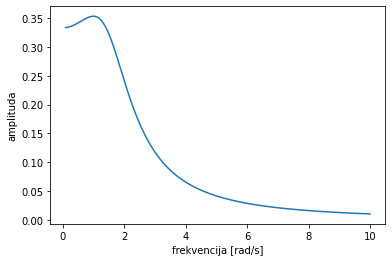

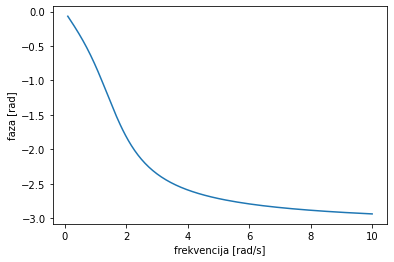

In [14]:
# Izračunaj frekvencijsku karakteristiku
w, H = freqs(num, den)

# Nacrtaj amplitudnu karakteristiku
figure(1)
plot(w, abs(H))
xlabel('frekvencija [rad/s]')
ylabel('amplituda')

# Nacrtaj faznu karakteristiku
figure(2)
plot(w, angle(H))
xlabel('frekvencija [rad/s]')
ylabel('faza [rad]');

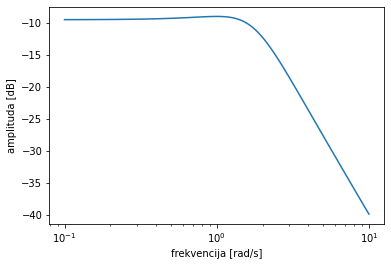

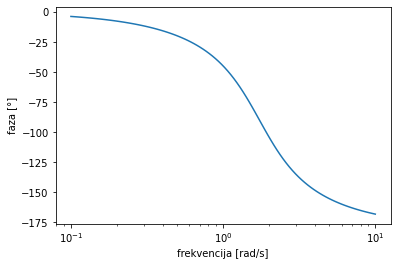

In [15]:
# Izračunaj amplitudnu karakterisitku u dB i faznu karakteristiku u stupnjevima
w, mag, phase = bode(sys)

# Nacrtaj amplitudnu karakteristiku
figure(3)
semilogx(w, mag)
xlabel('frekvencija [rad/s]')
ylabel('amplituda [dB]')

# Nacrtaj faznu karakterisitku
figure(4)
semilogx(w, phase)
xlabel('frekvencija [rad/s]')
ylabel('faza [°]');

### 2.2.5. Odziv na jedinični impuls i odziv na jediničnu stepenicu

Impulsni odziv $h(t)$ jest odziv mirnog sustava na jedinični impuls $\delta(t)$. Vremenski kontinuirani jedinični impuls još zovemo i [Diracovom delta distribucijom](https://en.wikipedia.org/wiki/Dirac_delta_function).

Mirni sustav jest sustav u kojem su svi početni uvjeti jednaki nuli.

Impulsni odziv i prijenosna funkcija su par po Laplaceovoj transformaciji, odnosno  $\mathcal{L}\bigl[h(t)\bigr]=H(s)$.

Ako je sustav stabilan onda je CTFT transformacija impulsnog odziva jednaka frekvencijskoj karakteristici tog sustava.

Nacrtamo li impulsni odziv onda temeljem te slike također možemo ispitati stabilnost sustava.

Ako $h(t)\to0$ za $t\to\infty$ onda kažemo da je sustav **stabilan**.

Ako $h(t)\to\pm\infty$ za $n\to\infty$ onda kažemo da je sustav **nestabilan**.

U posebnom slučaju kada je $h(t)$ ograničen a nije jednak nuli kada $t\to\infty$, odnosno $h(t)$ ili teži k nekoj konstanti $K\in\mathbb{R}\setminus\{0\}$ ili je periodičan, možemo kazati da je sustav **granično stabilan**.

Odziv na jediničnu stepenicu $s(t)$ definiramo kao odziv mirnog sustava na pobudu $\mu(t)$. Vremenski kontinuiranu jediničnu stepenicu još zovemo i [Heavisideovom fukncijom](https://en.wikipedia.org/wiki/Heaviside_step_function). Odziv na jediničnu stepenicu je od posebne važnosti u automatskom upravljanju jer pruža uvid u prijelazni odziv sustava.

Za računanje impulsnog odziva i odziva na stepenicu koristimo [`scipy.signal.impulse`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.impulse.html) i [`scipy.signal.step`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.step.html).

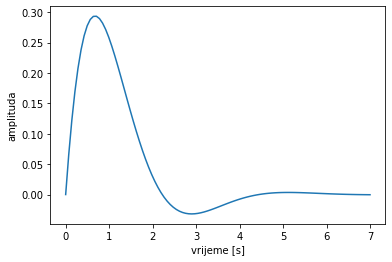

In [16]:
# Odredi impulsni odziv
t, h = impulse(sys)

# Nacrtaj impulsni odziv
figure(1)
plot(t, squeeze(h))
xlabel("vrijeme [s]")
ylabel("amplituda");

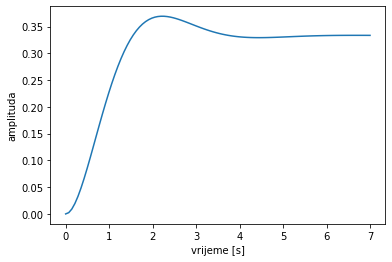

In [17]:
# Odredi odziv na jediničnu stepenicu
t, s = step(sys)

# Nacrtaj odziv na jediničnu stepenicu
figure(2)
plot(t, squeeze(s))
xlabel("vrijeme [s]")
ylabel("amplituda");

## 2.A Vremenski kontinuirani LTI sustav prvog reda

Vremenski kontinuiran LTI sustav prvog reda ima samo jedan pol. Uz taj pol može i ne mora imati jednu nulu. Ako je uz to sustav opisan diferencijalnom jednadžbom s realnim koeficijentima onda su i nula i pol čisto realni.

U trećem zadatku ove laboratorijske vježbe želimo ispitati sve moguće položaje tog jednog pola koji su od interesa. Prisjetite se da položaj pola obzirom na imaginarnu os definira stabilnost sustava. Prema tome, zanima nas kako se sustav ponaša za pol lijevo od imaginarne osi, za pol desno od imaginarne osi, i za pol koji se nalazi točno na imaginarnoj osi. Kako je jedan pol ograničen na realnu os sveukupno imamo tri moguća položaja pola koji su od interesa.

Neka promatrani vremenski kontinuirani LTI sustav ima točno jedan pol $p$ te neka je pripadna prijenosna funkcija

$$H(s)={1\over s-p}$$

Neka su $p_k\in\{-1,0,1\}$ tri broja koja definiraju tri različita položaja pola. Označimo s $H_k(s)$ prijenosnu funkciju koja odgovara polu $p_k$, odnosno $H_k(s)={1\over s-p_k}$; ovu oznaku koristite u vašim odgovorima kako bi jasno identificirali odgovarajući sustav.

Za svaki od tri pola definirajte prijenosnu funkciju, nađite njene nule i polove, izračunajte frekvencijsku karakteristiku (i to bez obzira na stabilnost sustava), nacrtajte amplitudnu i faznu frekvencijsku karakteristiku, te nacrtajte impulsni odziv, i to sve na način kako je objašnjeno u uvodnom dijelu ove vježbe.

In [18]:
# Upišite vaše rješenje

Nakon što ste analizirali svih šest zadanih sustava odgovorite na sljedeća pitanja:

Koji sustavi su stabilni, a koji su nestabilni? Objasnite zašto!

**OVDJE UPIŠITE VAŠ ODGOVOR**

Koji sustavi imaju istu amplitudno-frekvencijsku karakterisitku? Ako znate zašto su karakteristike identične onda uz odgovor dopišite i vaše objašnjenje!

**OVDJE UPIŠITE VAŠ ODGOVOR**

Što se događa s frekvencijskom karakteristikom u $\Omega=0$ za $p_2=0$?

**OVDJE UPIŠITE VAŠ ODGOVOR**

## 2.B Vremenski kontinuirani LTI sustav drugog reda

Vremenski kontinuirani LTI sustav drugog reda ima dva pola. Uz ta dva pola može i ne mora imati dvije ne-trivijalne nule. Ako je uz to sustav opisan diferencijalnom jednadžbom s realnim koeficijentima onda su njegove nule i polovi ili čisto realni ili dolaze u konjugirano-kompleksnim parovima.

U četvrtom zadatku ove vježbe želimo ispitati nekoliko zanimljivih položaja za dva pola.

Neka je promatrani vremenski kontinuirani LTI sustav drugog reda opisan prijenosnom funkcijom

$$H(s)={1\over s^2+2\zeta\Omega_0s+\Omega_0^2},$$

za koju je pripadna diferencijalna jednadžba

$$y''(t)+2\zeta\Omega_0y'(t)+\Omega_0^2y(t)=x(t).$$

Ovje je $\zeta$ faktor prigušenja sustava, a $\Omega_0$ je prirodna frekvencija sustava. Ovisno o vrijednostima koje poprima faktor prigušenja $\zeta$ razlikujemo četiri slučaja od interesa:

1.   Za $\zeta=0$ sustav je **neprigušen** i ima dva čisto imaginarna pola, odnosno sustav se ponaša kao oscilator.
2.   Za $0<\zeta<1$ sustav je **nedovoljno ili podkritično prigušen** i ima dva pola koja imaju i realni i imaginarni dio; prirodni odziv takvog sustava iskazuje prigušene oscilacije. 
3.   Za $\zeta=1$ sustav je **kritično prigušen** i ima dvostruki realni pol; u odzivu sustava više nema oscilacija.
4.   Za $1<\zeta$ sustav je **pretjerano ili nadkritično prigušen** i ima dva čisto realna pola.

Neka je $\Omega_0=4$ prirodna frekvencija sustava i neka su vrijednosti faktora prigušenja $\zeta$ iz skupa $\{0,0.1,0.4,1,4\}$, imamo dakle četiri vrijednosti faktora prigušenja koje definiraju četiri sustava od interesa.

Za svaki od zadana četiri sustava definirajte prijenosnu funkciju, nađite njene nule i polove, izračunajte frekvencijsku karakteristiku, nacrtajte amplitudnu i faznu frekvencijsku karakteristiku (bez obzira na stabilnost), te nacrtajte odziv na jediničnu stepenicu, i to sve na način kako je objašnjeno u uvodnom dijelu ove vježbe.

In [19]:
# Upišite vaše rješenje

Nakon što ste analizirali sve zadane sustave odgovorite na sljedeća pitanja:

Koji odzivi na stepenicu iskazuju oscijacije? Postoji li veza između amplitudno-frekvencijske karakteristike i jakosti oscilacija u odzivu?

**OVDJE UPIŠITE VAŠ ODGOVOR**

Za sustave koji iskazuju oscilatoran odziv od posebnog interesa jest fenomen rezonancije.

Razmotrimo ponovo vremenski kontinuirani LTI sustav drugog reda koji je opisan prijenosnom funkcijom

$$H(s)={1\over s^2+2\zeta\Omega_0s+\Omega_0^2},$$

za koju je pripadna diferencijalna jednadžba

$$y''(t)+2\zeta\Omega_0y'(t)+\Omega_0^2y(t)=x(t).$$

Neka je $\zeta=0$ i neka je $\Omega_0=0.4$.

Korištenjem funkcije [`scipy.signal.lsim`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lsim.html) izračunajte i nacrtajte odziv sustava za dva pobudna signala,

$$x_a(t)=\sin(\Omega_a t),\quad\Omega_a=0.04,$$

i

$$x_b(t)=\sin(\Omega_b t),\quad\Omega_b=0.4.$$

In [20]:
# Upišite vaše rješenje

Kada odredite oba odziva odgovorite na sljedeća pitanja:

Koja je značajna razlika između odziva na pobudu $x_a(t)$ i napobudu $x_b(t)$?

**OVDJE UPIŠITE VAŠ ODGOVOR**

Što se događa kada je prirodna frekvencija $\Omega_0$ nekog LTI sustava jednaka frekvenciji pobudnog signala $\Omega_a$?

**OVDJE UPIŠITE VAŠ ODGOVOR**